In [1]:
library(tidyverse)
library(wesanderson)
library(ggridges)
library(ggthemes)
library(reshape)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape’

The following object is masked from ‘package:dplyr’:

    rename

The following objects are masked from ‘package:tidyr’:

    expand, smiths



In [3]:
agg_data_path = '/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/'
setwd(agg_data_path)

In [ ]:
# linux_data_path <- '/home/krista/Documents/gitRepositories/volatileValues/simple_rt_experiment_probabilityC/data/'
# setwd(linux_data_path)

In [ ]:
# (files <- dir(path = linux_data_path, pattern = "^[0-9](.*)(_trialset[0-9].csv)$"))

In [ ]:
# raw_df <- files %>%
#   map(read_csv,col_types = cols()) %>%                  
#   reduce(rbind) 

In [ ]:
# (ID = map(files, substr, start=1, stop=4))
# raw_df$ID = as.numeric(ID)

In [ ]:
# condition = map(files, substr, start=10, stop=10)
# raw_df$condition <- as.numeric(condition)
# raw_df$condition <- recode(raw_df$condition, '0' = 'lc', '1' = 'hc', '2'='hv','3'='lv')
# head(raw_df)

In [ ]:
# colnames(clean_df)

In [4]:
clean_df <- read_csv('cleaned_probC_data_test.csv',col_types = cols())
raw_df <- read_csv('raw_probC_data_test.csv',col_types = cols())

(n_subjects = length(unique(clean_df$ID)))
(n_conditions = length(unique(clean_df$condition)))
n_clean_trials = 600

#do this when complete 
clean_df$trial <- rep(seq(1,n_clean_trials),n_subjects*n_conditions)
max(clean_df$trial)
head(clean_df); head(raw_df)

Warning message:
“Missing column names filled in: 'X1' [1]”Warning message:
“Missing column names filled in: 'X1' [1]”

[1] 20

[1] 4

[1] 600

X1,choice,accuracy,solution,reward,cumulative_reward,rt,total_trial_time,iti,cp_with_slow_fast,obs_cp_with_slow_fast,high_val_cue,ID,condition,trial
0,1,1,1,3,602,0.5540650,1.863330,0.3151120,0,0,112,776,lv,1
1,0,1,0,5,606,0.4221590,1.721799,0.3202834,0,0,112,776,lv,2
2,0,1,0,1,606,0.3108258,2.001336,0.7045839,0,0,112,776,lv,3
3,0,0,1,0,605,0.2568660,1.748328,0.5031988,0,1,111,776,lv,4
4,0,1,0,2,606,0.2299318,1.606700,0.3767704,0,1,112,776,lv,5
5,1,1,1,3,608,0.5069599,1.837049,0.3472566,0,0,112,776,lv,6


X1,choice,accuracy,solution,reward,cumulative_reward,rt,total_trial_time,iti,cp_with_slow_fast,obs_cp_with_slow_fast,high_val_cue,ID,condition
0,1,1,1,3,602,0.5540650,1.863330,0.3151120,0,0,112,776,lv
1,0,1,0,5,606,0.4221590,1.721799,0.3202834,0,0,112,776,lv
2,0,1,0,1,606,0.3108258,2.001336,0.7045839,0,0,112,776,lv
3,0,0,1,0,605,0.2568660,1.748328,0.5031988,0,1,111,776,lv
4,0,1,0,2,606,0.2299318,1.606700,0.3767704,0,1,112,776,lv
5,1,1,1,3,608,0.5069599,1.837049,0.3472566,0,0,112,776,lv


In [5]:
table(clean_df$ID)
table(clean_df$condition)


 761  762  763  764  765  766  767  768  769  770  771  772  773  775  776  777 
2400 2400 2400 2400 2400 2400 2400 2400 2400 2400 2400 2400 2400 2400 2400 2400 
 778  779  780  781 
2400 2400 2400 2400 


   hc    hv    lc    lv 
12000 12000 12000 12000 

In [6]:
subset(clean_df, trial > 1 & trial < 300)

X1,choice,accuracy,solution,reward,cumulative_reward,rt,total_trial_time,iti,cp_with_slow_fast,obs_cp_with_slow_fast,high_val_cue,ID,condition,trial
1,0,1,0,5,606,0.4221590,1.721799,0.3202834,0,0,112,776,lv,2
2,0,1,0,1,606,0.3108258,2.001336,0.7045839,0,0,112,776,lv,3
3,0,0,1,0,605,0.2568660,1.748328,0.5031988,0,1,111,776,lv,4
4,0,1,0,2,606,0.2299318,1.606700,0.3767704,0,1,112,776,lv,5
5,1,1,1,3,608,0.5069599,1.837049,0.3472566,0,0,112,776,lv,6
6,1,1,1,2,609,0.4246440,2.125723,0.7226772,0,0,112,776,lv,7
7,1,1,1,2,610,0.2516000,1.729187,0.4854860,0,0,112,776,lv,8
8,0,1,0,4,613,0.2821252,2.020255,0.7389089,0,0,112,776,lv,9
9,0,1,0,5,617,0.2165360,1.611865,0.4011679,0,0,112,776,lv,10
10,0,1,0,3,619,0.3339889,1.643104,0.3110928,0,0,112,776,lv,11


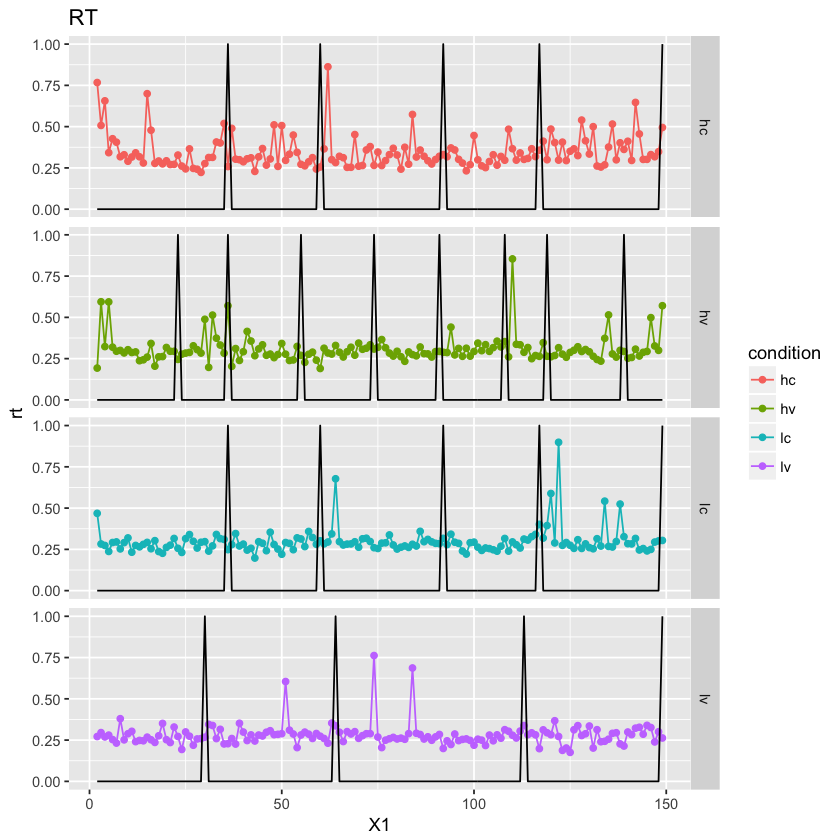

In [7]:
ggplot(subset(raw_df, X1 > 1 & X1 < 150 & ID == 761), aes(X1, rt, color=condition)) +
    geom_point() + geom_line() + facet_grid( condition~.) + ggtitle('RT') + geom_line(aes(X1,cp_with_slow_fast), color='black')

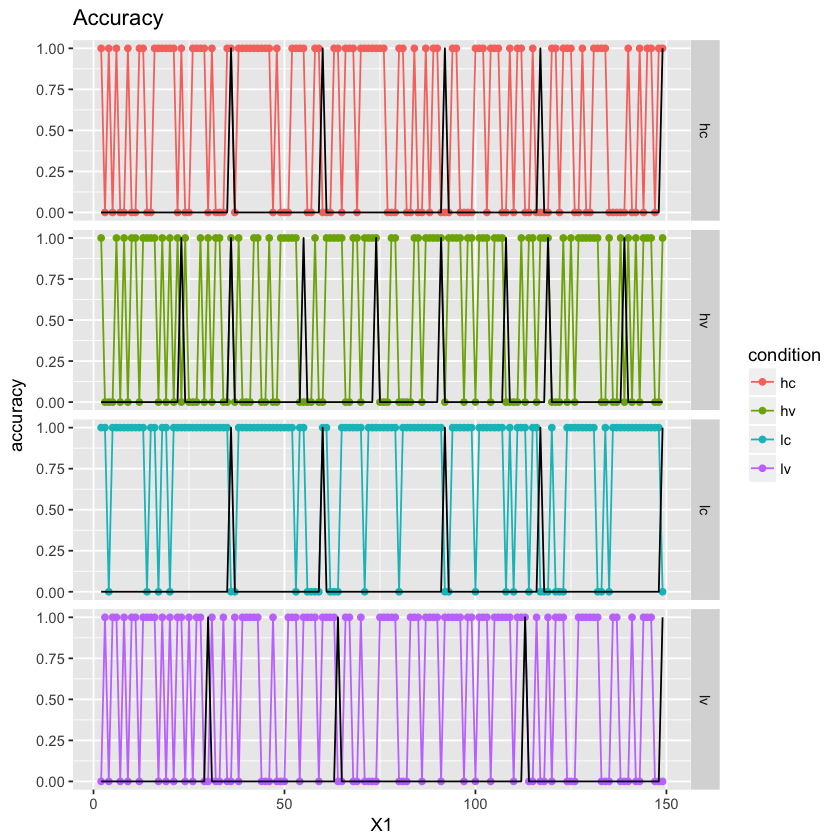

In [8]:
ggplot(subset(raw_df, X1 > 1 & X1 < 150 & ID == 761), aes(X1, accuracy, color=condition)) +
    geom_point() + geom_line() + facet_grid( condition~.) + ggtitle('Accuracy') + geom_line(aes(X1,cp_with_slow_fast), color='black')

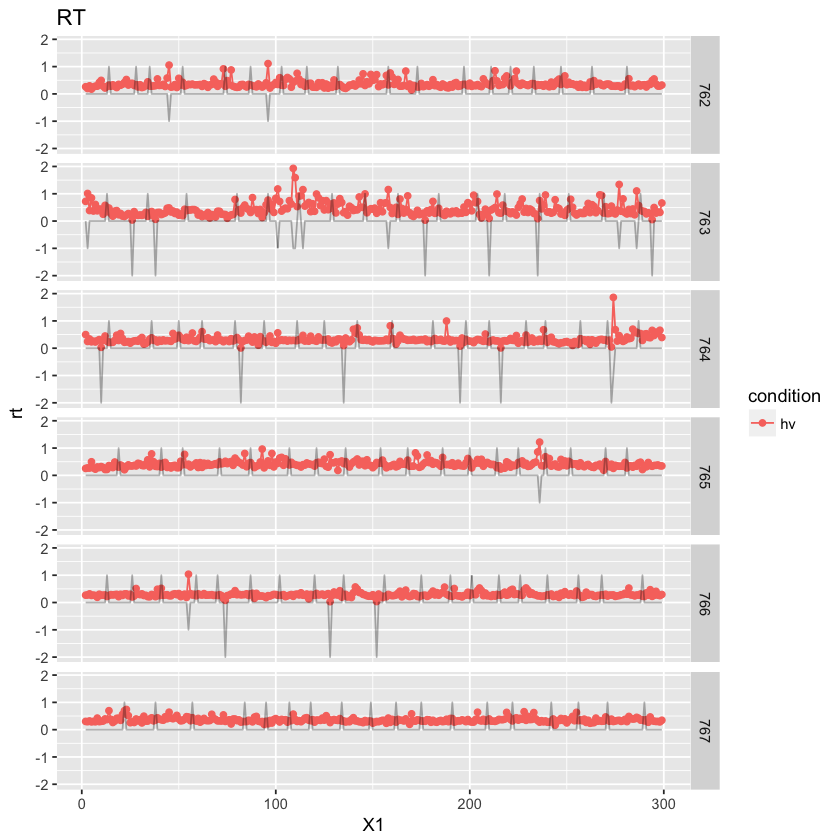

In [9]:
ggplot(subset(raw_df, X1 > 1 & X1 < 300 & condition == 'hv' & ID > 761 & ID < 768), aes(X1, rt, color=condition)) +
    geom_point() + geom_line() + facet_grid( ID~.) + ggtitle('RT') + geom_line(aes(X1,cp_with_slow_fast), color='black', alpha=0.3)

In [10]:
(expected_rows = n_subjects*n_conditions*n_clean_trials)
nrow(clean_df)

[1] 48000

[1] 48000

In [11]:
fast_slow_trial_freq <- raw_df %>% 
    group_by(ID, condition) %>%  summarize(n_fast_trials = sum(cp_with_slow_fast == -2), 
n_slow_trials = sum(cp_with_slow_fast == -1))

(unique_conds_per_s <- raw_df %>% 
    group_by(ID) %>% summarise(unique_conds_per_s=n_distinct(condition)))

ID,unique_conds_per_s
761,4
762,4
763,4
764,4
765,4
766,4
767,4
768,4
769,4
770,4


In [12]:
(obs_rows <- nrow(clean_df)); expected_rows
obs_rows == expected_rows

[1] 48000

[1] 48000

[1] TRUE

In [13]:
(group_acc <- clean_df %>% 
group_by(condition) %>%  summarize(mean_acc = mean(accuracy))
)
(group_rt <- clean_df %>% 
group_by(condition) %>% summarize(mu_rt=mean(rt)))

condition,mean_acc
hc,0.5309167
hv,0.5612500
lc,0.6527500
lv,0.5963333


condition,mu_rt
hc,0.3318476
hv,0.3419606
lc,0.3248985
lv,0.3254246


In [14]:
(sub_acc <- clean_df %>% 
group_by(condition,ID) %>%  summarize(mean_acc = mean(accuracy))
)
(sub_rt <- clean_df %>% 
group_by(condition,ID) %>% summarize(mean_rt=mean(rt)))

condition,ID,mean_acc
hc,761,0.5466667
hc,762,0.5350000
hc,763,0.5316667
hc,764,0.5116667
hc,765,0.5566667
hc,766,0.5616667
hc,767,0.5200000
hc,768,0.4750000
hc,769,0.5383333
hc,770,0.5100000


condition,ID,mean_rt
hc,761,0.3393513
hc,762,0.3880563
hc,763,0.3273411
hc,764,0.2909015
hc,765,0.3580569
hc,766,0.2963694
hc,767,0.3729386
hc,768,0.3568124
hc,769,0.3112072
hc,770,0.3052426


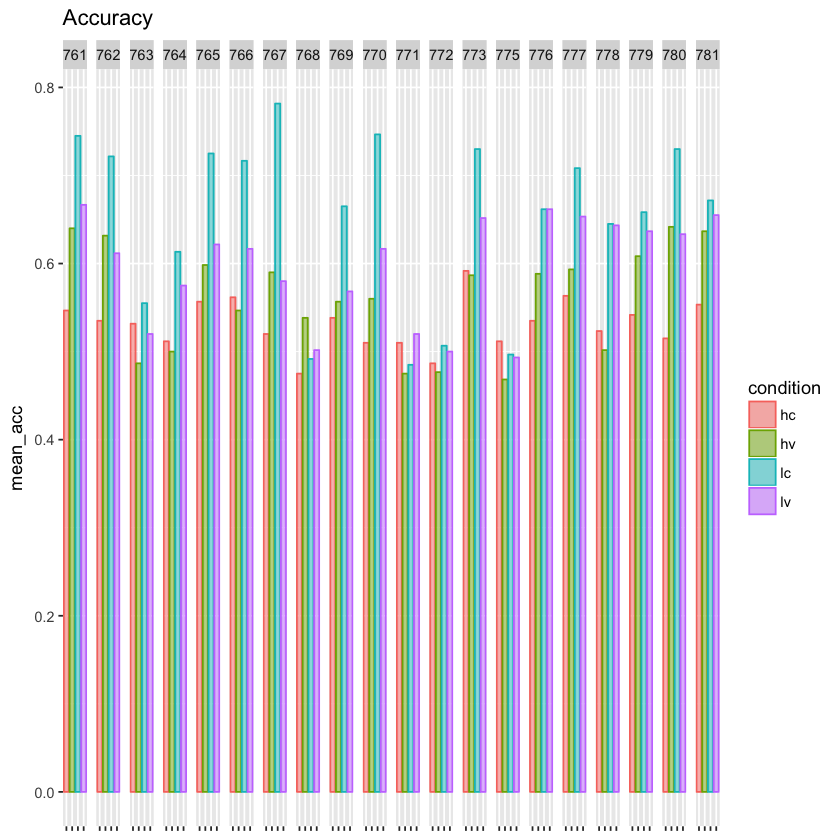

In [15]:
ggplot(sub_acc, aes(x = condition, y=mean_acc, color=condition, fill=condition)) +
    geom_bar(stat='identity', alpha=0.5) + facet_grid(.~ID) +ggtitle('Accuracy') + theme(        axis.text.x=element_blank(), axis.title.x=element_blank())

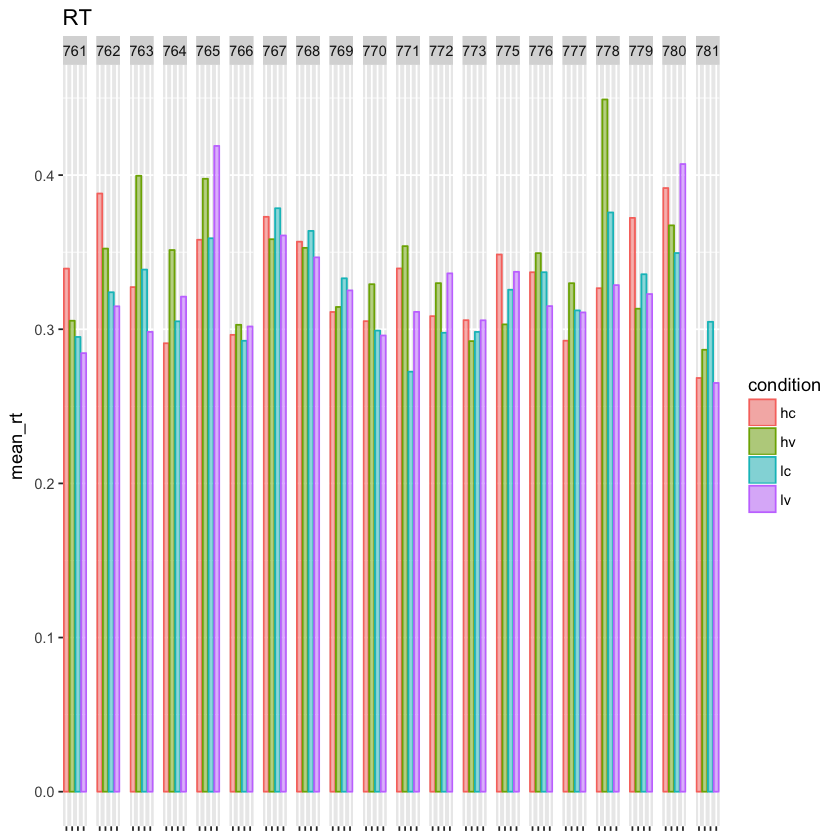

In [16]:
ggplot(sub_rt, aes(x = condition, y=mean_rt, color=condition, fill=condition)) +
    geom_bar(stat='identity', alpha=0.5) + facet_grid(.~ID) +ggtitle('RT')  + theme(        axis.text.x=element_blank(), axis.title.x=element_blank())

In [17]:
fast_slow_trial_freq$n_fast_trials; fast_slow_trial_freq$n_slow_trials

[1]  0  0  0  1  0  2  1  0  4 11  7 11  9 11  4  4  2  0  4  2  4  8  3  4  5
[26]  0  0  1 28 12 45 26  1  6  4  6  2  0  1  0  1  0  6  0 17 11 13 13  1  0
[51]  0  1  8  8  5 13  1  3  2  0  1  1  0  0  0  6  1  1  4  0  2  1  1  0  0
[76]  0  0  1  1  2

[1]  1  0  0  0  8  2  2  1  0 12  2  1  5  3  0  4  1  1  1  4  2  1  1  0  3
[26]  2  0  4 25 15 76  9  0  2  0  2  0  1  0  0  1  3  1  0 12 10  5  7  1  0
[51]  0  0 15 11  6  5 19 25  2  2  0  0  0  0  0  6  2  0  1  0  0  1  1  1  0
[76]  1  0  0  1  0

In [18]:
(total_n_trials <- n_clean_trials + fast_slow_trial_freq$n_fast_trials + fast_slow_trial_freq$n_slow_trials
)

round(fast_slow_trial_freq$n_fast_trials/total_n_trials,4)
round(fast_slow_trial_freq$n_slow_trials/total_n_trials,4)

[1] 601 600 600 601 608 604 603 601 604 623 609 612 614 614 604 608 603 601 605
[20] 606 606 609 604 604 608 602 600 605 653 627 721 635 601 608 604 608 602 601
[39] 601 600 602 603 607 600 629 621 618 620 602 600 600 601 623 619 611 618 620
[58] 628 604 602 601 601 600 600 600 612 603 601 605 600 602 602 602 601 600 601
[77] 600 601 602 602

[1] 0.0000 0.0000 0.0000 0.0017 0.0000 0.0033 0.0017 0.0000 0.0066 0.0177
[11] 0.0115 0.0180 0.0147 0.0179 0.0066 0.0066 0.0033 0.0000 0.0066 0.0033
[21] 0.0066 0.0131 0.0050 0.0066 0.0082 0.0000 0.0000 0.0017 0.0429 0.0191
[31] 0.0624 0.0409 0.0017 0.0099 0.0066 0.0099 0.0033 0.0000 0.0017 0.0000
[41] 0.0017 0.0000 0.0099 0.0000 0.0270 0.0177 0.0210 0.0210 0.0017 0.0000
[51] 0.0000 0.0017 0.0128 0.0129 0.0082 0.0210 0.0016 0.0048 0.0033 0.0000
[61] 0.0017 0.0017 0.0000 0.0000 0.0000 0.0098 0.0017 0.0017 0.0066 0.0000
[71] 0.0033 0.0017 0.0017 0.0000 0.0000 0.0000 0.0000 0.0017 0.0017 0.0033

[1] 0.0017 0.0000 0.0000 0.0000 0.0132 0.0033 0.0033 0.0017 0.0000 0.0193
[11] 0.0033 0.0016 0.0081 0.0049 0.0000 0.0066 0.0017 0.0017 0.0017 0.0066
[21] 0.0033 0.0016 0.0017 0.0000 0.0049 0.0033 0.0000 0.0066 0.0383 0.0239
[31] 0.1054 0.0142 0.0000 0.0033 0.0000 0.0033 0.0000 0.0017 0.0000 0.0000
[41] 0.0017 0.0050 0.0016 0.0000 0.0191 0.0161 0.0081 0.0113 0.0017 0.0000
[51] 0.0000 0.0000 0.0241 0.0178 0.0098 0.0081 0.0306 0.0398 0.0033 0.0033
[61] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0098 0.0033 0.0000 0.0017 0.0000
[71] 0.0000 0.0017 0.0017 0.0017 0.0000 0.0017 0.0000 0.0000 0.0017 0.0000

In [19]:
head(raw_df)
(n_subjects = length(unique(raw_df$ID))
)
(n_conditions = length(unique(raw_df$condition))
)# clean_df <- subset(raw_df, cp_with_slow_fast == 0 | cp_with_slow_fast == 1)
# # clean_df$trial <- rep(seq(1,600),n_subjects*n_conditions)
# # dim(clean_df)


X1,choice,accuracy,solution,reward,cumulative_reward,rt,total_trial_time,iti,cp_with_slow_fast,obs_cp_with_slow_fast,high_val_cue,ID,condition
0,1,1,1,3,602,0.5540650,1.863330,0.3151120,0,0,112,776,lv
1,0,1,0,5,606,0.4221590,1.721799,0.3202834,0,0,112,776,lv
2,0,1,0,1,606,0.3108258,2.001336,0.7045839,0,0,112,776,lv
3,0,0,1,0,605,0.2568660,1.748328,0.5031988,0,1,111,776,lv
4,0,1,0,2,606,0.2299318,1.606700,0.3767704,0,1,112,776,lv
5,1,1,1,3,608,0.5069599,1.837049,0.3472566,0,0,112,776,lv


[1] 20

[1] 4

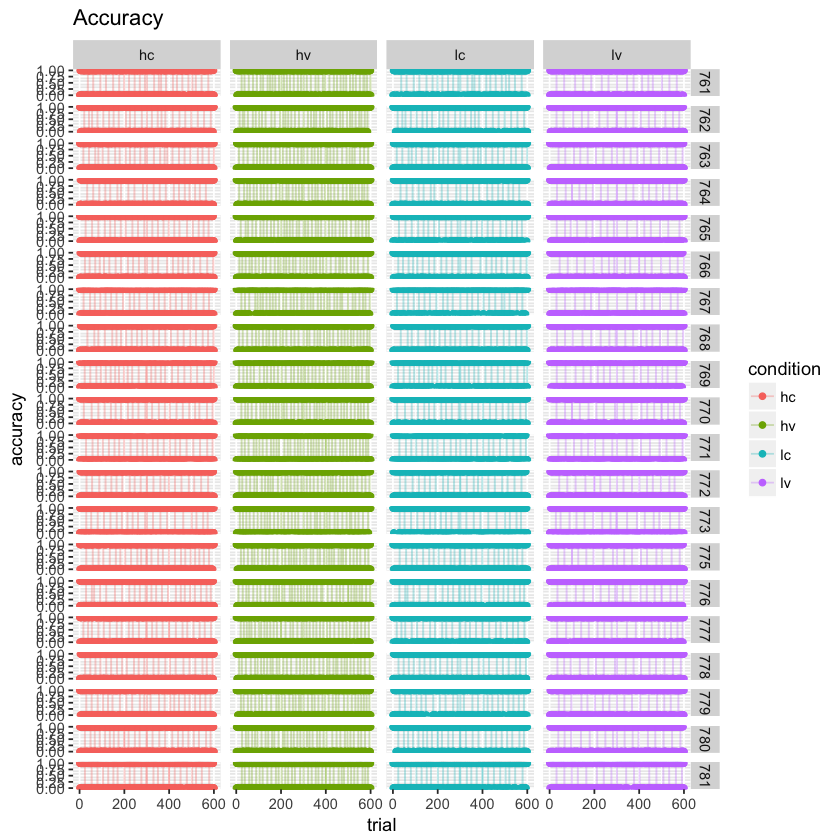

In [20]:
ggplot(clean_df, aes(trial, accuracy, color=condition)) +
    geom_point() +  geom_line(data=clean_df, aes(trial, cp_with_slow_fast), alpha=0.3) + facet_grid( ID ~ condition) + ggtitle('Accuracy') 

In [ ]:
ggplot(subset(clean_df, condition=='lc'), aes(trial, accuracy, color=condition)) +
    geom_point() + geom_line() + facet_grid( ID~.) + ggtitle('Accuracy')

In [ ]:
ggplot(clean_df, aes(trial, rt, color=condition)) +
    geom_point() + geom_line() + facet_grid(ID ~ condition) + ggtitle('Reaction Time')

In [ ]:
ggplot(clean_df, aes(rt, fill=condition)) +
geom_density(alpha=0.5) + facet_grid(ID ~ condition) + ggtitle('Reaction Times')

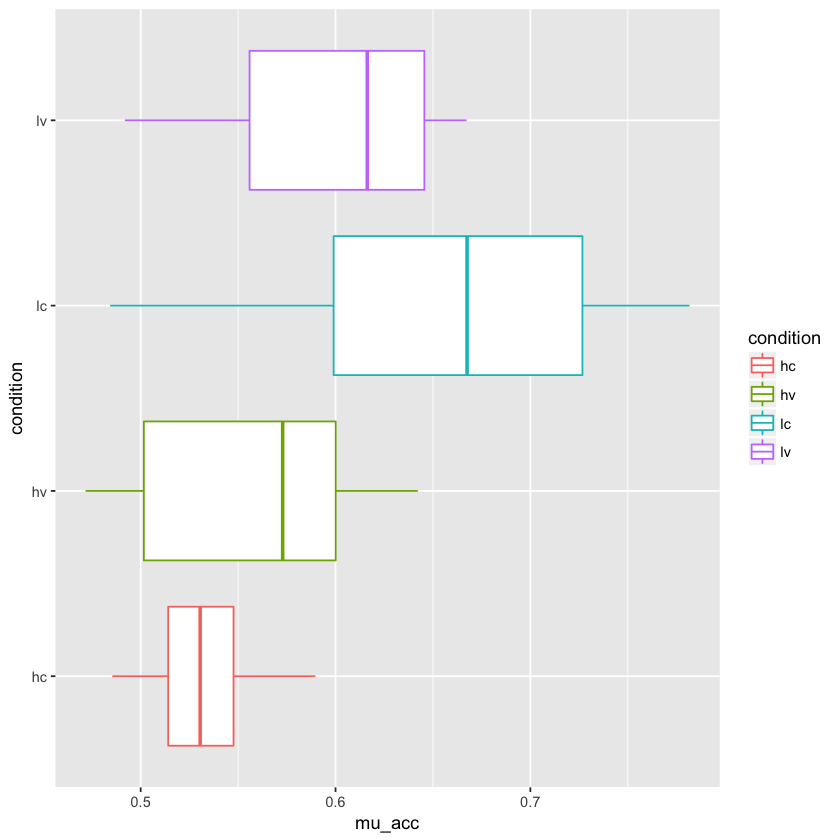

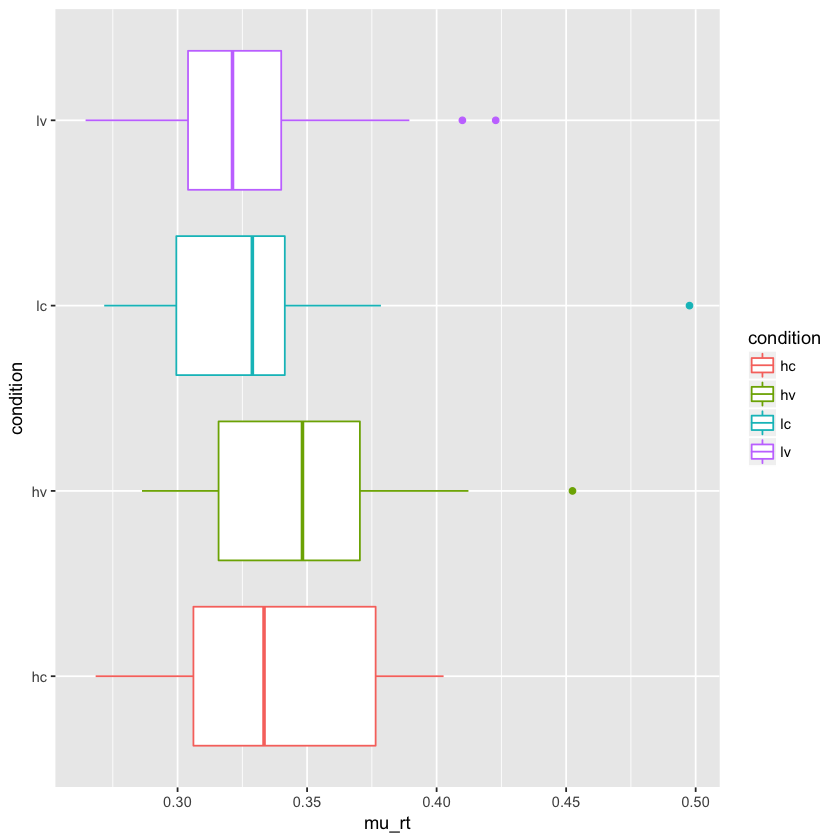

In [22]:
acc_stats <- raw_df %>% 
    group_by(ID, condition) %>% summarize(mu_acc=mean(accuracy))

rt_stats <- raw_df %>% 
    group_by(ID, condition) %>% summarize(mu_rt=mean(rt))

# ggplot(acc_stats, aes(mu_acc, ID)) +
#     geom_point(aes(fill=condition)) + coord_flip()

ggplot(acc_stats, aes(x=condition, y=mu_acc)) +
    geom_boxplot(aes(color=condition)) + coord_flip()

ggplot(rt_stats, aes(x=condition, y=mu_rt)) +
    geom_boxplot(aes(color=condition)) + coord_flip()

Picking joint bandwidth of 0.00965


Saving 7 x 7 in image
Picking joint bandwidth of 0.00965


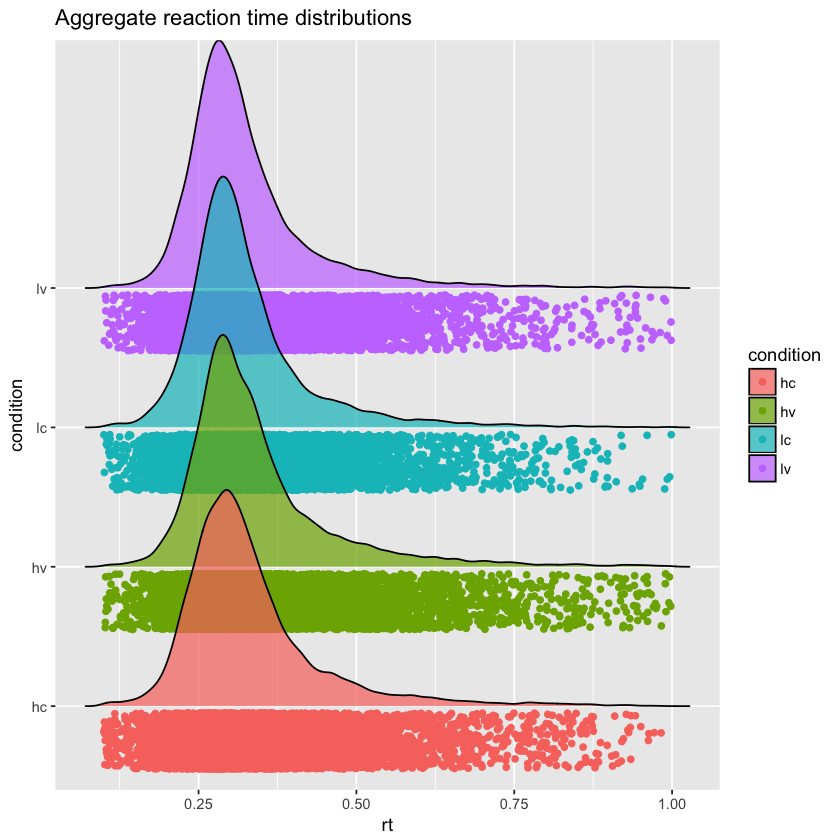

In [24]:
ggplot(clean_df, aes(rt,condition, fill=condition)) +
  geom_density_ridges(jittered_points = TRUE, position = "raincloud",
                      alpha = 0.7, aes(point_color = condition, point_fill = condition)) + ggtitle('Aggregate reaction time distributions ')

ggsave('condition_rt_dist.pdf')

In [ ]:
# ggplot(clean_df, aes(accuracy,condition, fill=condition)) +
#   geom_density_ridges(jittered_points = TRUE, position = "raincloud",
#                       alpha = 0.7, aes(point_color = condition, point_fill = condition)) + facet_grid(ID ~.) + ggtitle('Subject-level accuracy distributions ')

Picking joint bandwidth of 0.0675


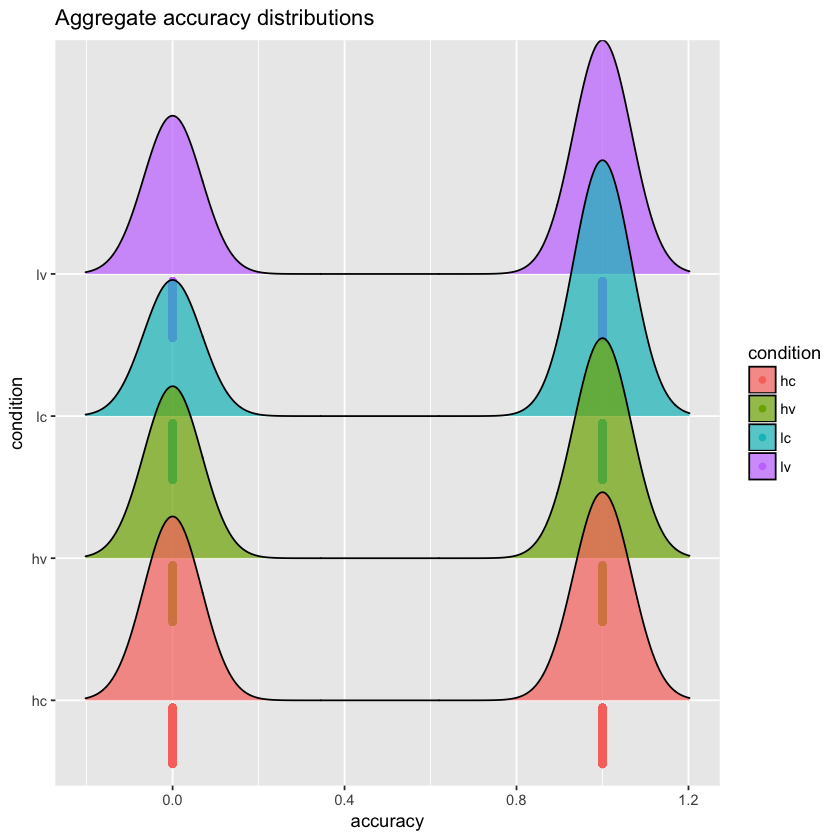

In [25]:
ggplot(clean_df, aes(accuracy,condition, fill=condition)) +
  geom_density_ridges(jittered_points = TRUE, position = "raincloud",
                      alpha = 0.7, aes(point_color = condition, point_fill = condition)) +  ggtitle('Aggregate accuracy distributions ')

In [ ]:
#step 1: find the indices that correspond to the changepoint 
cp_idx <- which(clean_df$cp_with_slow_fast == 1)
#get trial before cp 
start_idx <- cp_idx - 1 
#add e. length  
end_idx <- cp_idx + 9

#construct intervals according to the start and end idx 
intervals <- mapply(seq, start_idx, end_idx)
conditions <- data.frame(condition=clean_df$condition[start_idx])
dim(conditions)

conditions_vec <- rep(conditions$condition, each=11)
rt_vec_slice <- clean_df$rt[intervals]
acc_vec_slice <- clean_df$accuracy[intervals]
# new_df = data.frame(t=conditions_vec)
# tail(new_df)

In [ ]:
clean_df[start_idx,'ID']

In [ ]:
#check intervals
start_idx[3]
end_idx[3]
intervals[,3]
#next, construct new df with these vals. 

#interval columns are cps
#rows are trials

In [ ]:
lc <- sliced_df %>%
          filter(conditions =='lc')  

hc <- sliced_df %>%
          filter(conditions =='hc')  

lv <- sliced_df %>%
          filter(conditions =='lv')  
hv <- sliced_df %>%
          filter(conditions =='hv')  


lc_rt_vec = c(1:nrow(intervals))
hc_rt_vec = c(1:nrow(intervals))
hv_rt_vec = c(1:nrow(intervals))
lv_rt_vec = c(1:nrow(intervals))


lc_acc_vec = c(1:nrow(intervals))
hc_acc_vec = c(1:nrow(intervals))
hv_acc_vec = c(1:nrow(intervals))
lv_acc_vec = c(1:nrow(intervals))

for (idx in 1:nrow(intervals)){
lc_rt_vec[idx] <- mean(lc[lc$epoch_trial == idx, 'rt'], na.rm = TRUE)  
hc_rt_vec[idx] <- mean(hc[hc$epoch_trial == idx, 'rt'],na.rm = TRUE)   
hv_rt_vec[idx] <- mean(hv[hv$epoch_trial == idx, 'rt'],na.rm = TRUE)   
lv_rt_vec[idx] <- mean(lv[lv$epoch_trial == idx, 'rt'],na.rm = TRUE)  
    
lc_acc_vec[idx] <- mean(lc[lc$epoch_trial == idx, 'acc'],na.rm = TRUE)  
hc_acc_vec[idx] <- mean(hc[hc$epoch_trial == idx, 'acc'],na.rm = TRUE)   
hv_acc_vec[idx] <- mean(hv[hv$epoch_trial == idx, 'acc'],na.rm = TRUE)   
lv_acc_vec[idx] <- mean(lv[lv$epoch_trial == idx, 'acc'],na.rm = TRUE)  
}

acc_df <- data.frame(lc_acc_vec, hc_acc_vec,hv_acc_vec, lv_acc_vec)
rt_df <- data.frame(lc_rt_vec, hc_rt_vec,hv_rt_vec, lv_rt_vec)

In [ ]:
gg_df_acc <- stack(acc_df)
gg_df_acc$ind <- sub("^(hc).*", "hc", gg_df_acc$ind)
gg_df_acc$ind <- sub("^(lc).*", "lc", gg_df_acc$ind)
gg_df_acc$ind <- sub("^(hv).*", "hv", gg_df_acc$ind)
gg_df_acc$ind <- sub("^(lv).*", "lv", gg_df_acc$ind)
colnames(gg_df_acc) <- c('accuracy', 'condition')


In [ ]:
gg_df_rt <- stack(rt_df)
gg_df_rt$ind <- sub("^(hc).*", "hc", gg_df_rt$ind)
gg_df_rt$ind <- sub("^(lc).*", "lc", gg_df_rt$ind)
gg_df_rt$ind <- sub("^(hv).*", "hv", gg_df_rt$ind)
gg_df_rt$ind <- sub("^(lv).*", "lv", gg_df_rt$ind)
colnames(gg_df_rt) <- c('rt', 'condition')

In [ ]:
gg_df <- cbind(gg_df_acc, gg_df_rt)
gg_df$trial <- rep(seq(1,11),4)
head(gg_df,12)

In [ ]:
conflict_rt_plt <- ggplot(subset(gg_df, condition=='hc'| condition=='lc'), aes(x=trial,y=rt, color=condition)) + geom_point() + geom_line()+ ylim(0.25,0.45) +  geom_vline(xintercept=2)
conflict_acc_plt <- ggplot(subset(gg_df, condition=='hc'| condition=='lc'), aes(x=trial,y=accuracy, color=condition)) + geom_point() + geom_line()+ ylim(0,1) +  geom_vline(xintercept=2) + geom_hline(yintercept = 0.65, color='red', alpha=0.5) + geom_hline(yintercept = 0.85, color='blue', alpha=0.5)

In [ ]:
vol_rt_plt <- ggplot(subset(gg_df, condition=='hv'| condition=='lv'), aes(x=trial,y=rt, color=condition)) + geom_point() + geom_line()+ ylim(0.25,0.45) +  geom_vline(xintercept=2)
vol_acc_plt <- ggplot(subset(gg_df, condition=='hv'| condition=='lv'), aes(x=trial,y=accuracy, color=condition)) + geom_point() + geom_line()+ ylim(0,1) +  geom_vline(xintercept=2) + geom_hline(yintercept = 0.75, color='gray')

## Conflict time series 

In [ ]:
library(boot)
?tsboot

In [ ]:
 conflict_acc_plt;conflict_rt_plt

## Volatility time series

In [ ]:
vol_acc_plt;vol_rt_plt

## Bootstrapped distributions of point estimates for behavior (mu accuracy, rt) 
### Note that this is currently over all trials. Need to bootstrap the average for each time point in the series that I'm plotting for nonparametric CIs.

In [26]:
setwd('/Users/Krista/Documents/R/functions')
source("bootstrap.R")

ERROR: Error in setwd("/Users/Krista/Documents/R/functions"): cannot change working directory


In [ ]:
# would have been elegant but doesn't work as is
# condition_rt.boot <- sparse_df %>%  
#     group_by(condition)  %>% select(rt) %>% map(boot.mean)

In [ ]:
hc_rt.boot <- boot.mean(unlist(clean_df[which(clean_df$condition=='hc'), 'rt']))
lc_rt.boot <- boot.mean(unlist(clean_df[which(clean_df$condition=='lc'), 'rt']))

hv_rt.boot <- boot.mean(unlist(clean_df[which(clean_df$condition=='hv'), 'rt']))
lv_rt.boot <- boot.mean(unlist(clean_df[which(clean_df$condition=='lv'), 'rt']))

In [ ]:
hc_acc.boot <- boot.mean(unlist(clean_df[which(clean_df$condition=='hc'), 'accuracy']))
lc_acc.boot <- boot.mean(unlist(clean_df[which(clean_df$condition=='lc'), 'accuracy']))

hv_acc.boot <- boot.mean(unlist(clean_df[which(clean_df$condition=='hv'), 'accuracy']))
lv_acc.boot <- boot.mean(unlist(clean_df[which(clean_df$condition=='lv'), 'accuracy']))

In [ ]:
hc_rt.boot$interval; lc_rt.boot$interval
hc_acc.boot$interval; lc_acc.boot$interval

In [ ]:
hv_rt.boot$interval; lv_rt.boot$interval
hv_acc.boot$interval; lv_acc.boot$interval

In [ ]:
#want to overlay bootstrapped distributions for counter conditions 
conflict_rt.boot <- data.frame(stack(c(hc_rt_boot = hc_rt.boot$boot.statistics, lc_rt_boot=lc_rt.boot$boot.statistics)))
colnames(conflict_rt.boot) = c('bootstrapped_rt', 'condition')
conflict_rt.boot$condition <- sub("^(hc).*", "hc", conflict_rt.boot$condition)
conflict_rt.boot$condition <- sub("^(lc).*", "lc", conflict_rt.boot$condition)

In [ ]:
conflict_acc.boot <- data.frame(stack(c(hc_acc_boot = hc_acc.boot$boot.statistics, lc_acc_boot=lc_acc.boot$boot.statistics)))
colnames(conflict_acc.boot) = c('bootstrapped_acc', 'condition')
conflict_acc.boot$condition <- sub("^(hc).*", "hc", conflict_acc.boot$condition)
conflict_acc.boot$condition <- sub("^(lc).*", "lc", conflict_acc.boot$condition)

In [ ]:
#volatility bootstrapping 
vol_rt.boot <- data.frame(stack(c(hv_rt_boot = hv_rt.boot$boot.statistics, lv_rt_boot=lv_rt.boot$boot.statistics)))
colnames(vol_rt.boot) = c('bootstrapped_rt', 'condition')
vol_rt.boot$condition <- sub("^(hv).*", "hv", vol_rt.boot$condition)
vol_rt.boot$condition <- sub("^(lv).*", "lv", vol_rt.boot$condition)

In [ ]:
vol_acc.boot <- data.frame(stack(c(hv_acc_boot = hv_acc.boot$boot.statistics, lv_acc_boot=lv_acc.boot$boot.statistics)))
colnames(vol_acc.boot) = c('bootstrapped_acc', 'condition')
vol_acc.boot$condition <- sub("^(hv).*", "hv", vol_acc.boot$condition)
vol_acc.boot$condition <- sub("^(lv).*", "lv", vol_acc.boot$condition)

In [ ]:
binwidth = diff(range(conflict_rt.boot$bootstrapped_rt))/30
ggplot(conflict_rt.boot, aes(x=bootstrapped_rt)) + 
       geom_histogram(aes(y=..density..),binwidth=binwidth) + geom_density(aes(color=condition, fill=condition), alpha=0.2) + labs(title='conflict rt')

In [ ]:
binwidth = diff(range(vol_rt.boot$bootstrapped_rt))/30
ggplot(vol_rt.boot, aes(x=bootstrapped_rt)) + 
       geom_histogram(aes(y=..density..),binwidth=binwidth) + geom_density(aes(color=condition, fill=condition), alpha=0.2) + labs(title='volatility rt')

In [ ]:
binwidth = diff(range(vol_acc.boot$bootstrapped_acc))/30
ggplot(vol_acc.boot, aes(x=bootstrapped_acc)) + 
       geom_histogram(aes(y=..density..),binwidth=binwidth) + geom_density(aes(color=condition, fill=condition), alpha=0.2) + labs(title='volatility accuracy')

In [ ]:
binwidth = diff(range(conflict_acc.boot$bootstrapped_acc))/30
ggplot(conflict_acc.boot, aes(x=bootstrapped_acc)) + 
       geom_histogram(aes(y=..density..),binwidth=binwidth) + geom_density(aes(color=condition, fill=condition), alpha=0.2) + labs(title='conflict accuracy')

## bootstrapping example

In [ ]:
library(Lock5Data)
data(CommuteAtlanta)

In [ ]:
str(CommuteAtlanta)

In [ ]:
#find sample mean first
(time.mean = with(CommuteAtlanta, mean(Time)))

In [ ]:
#finding se 
#sample with replacement to form a matrix with one row for each bootstrap sample 
#and one column for each sampled value, matching original n
n_bootstrap_samples = 1000
n_sampled_vals = nrow(CommuteAtlanta)
boot.samples = matrix(sample(CommuteAtlanta$Time, size = n_bootstrap_samples * n_sampled_vals, replace = TRUE),
n_bootstrap_samples, n_sampled_vals)

In [ ]:
#now take average of each row of boot samples 
boot.statistics = apply(boot.samples, 1, mean)

In [ ]:
#visualize bootstrapped distribution of means
ggplot(data.frame(meanTime = boot.statistics),aes(x=meanTime)) +
geom_histogram(binwidth=0.25,aes(y=..density..)) +
geom_density(color="red")

In [ ]:
#find se of bootstrapped mean (std of dist. of means)
(time.se = sd(boot.statistics))

In [ ]:
#calc. bootstrapped confidence interval 
me = ceiling(10 * 2 * time.se)/10
round(time.mean, 1) + c(-1, 1) * me